In [1]:
import jax
import jax.numpy as jnp
# import jraph

In [4]:
from scipy.sparse import csr_array, csr_matrix

import pandas as pd
import numpy as np
import json

from implicit.als import AlternatingLeastSquares

In [5]:
pd.set_option('display.max_rows', 125)
pd.set_option('display.max_columns', 99)

In [7]:
import plotly.express as px
import plotly.graph_objects as go

# Sendage

In [72]:
filename = '~/Downloads/2023-03-26_sendage.h5'
boulders = pd.read_hdf(filename, 'boulders')
ascents_df = pd.read_hdf(filename, 'ascents')
climbs_df = pd.read_hdf(filename, 'climbs')
climbers_df = pd.read_hdf(filename, 'climbers')

In [53]:
boulders.loc[filt].iloc[375]

slug             disciple-prophet-wall-skaha-bc-canada
name                                      The Disciple
area_id                                          10385
type                                           boulder
grade_id                                            97
bolts                                                0
length                                             NaN
grade                                                +
description                                           
# onsights                                           0
# redpoint                                           0
# flashes                                            0
# sends                                              0
areas_0_name                                     Skaha
areas_1_name                              Prophet Wall
areas_2_name                                          
areas_0_slug                           skaha-bc-canada
areas_1_slug              prophet-wall-skaha-bc-canada
areas_2_sl

In [73]:
boulders = boulders.drop(136733)

In [74]:
boulders['# sends'] = boulders['# onsights'] + boulders['# redpoint'] + boulders['# flashes']
climbs_df['# sends'] = climbs_df['# onsights'] + climbs_df['# redpoint'] + climbs_df['# flashes']

In [75]:
ascents_df.head()

,climb_id,user,date,grade,style,first-ascent,stars,comments,beta
0,36512,hucklord,2023-02-12,V4,redpoint,False,5.0,,
1,36512,rajsoni,2023-01-24,V4,flash,False,NaN,,
2,36512,maude-johnson,2022-11-01,V4,redpoint,False,5.0,,
3,36512,bethany-van-hierden,2022-10-20,V4,redpoint,False,NaN,2nd go.,
4,36512,alessandroroome-sandrin,2022-10-12,V4,redpoint,False,4.0,,


In [25]:
ascents_df.mean()

/var/folders/bj/_xdx3pvd5yx3t5gm46xh5b340000gn/T/ipykernel_9143/771597618.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ascents_df.mean()
/var/folders/bj/_xdx3pvd5yx3t5gm46xh5b340000gn/T/ipykernel_9143/771597618.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ascents_df.mean()


climb_id        62906.645803
first-ascent        0.015570
stars               3.498604
dtype: float64

In [76]:
boulders['V grade'] = 0
filt = boulders['grade'].str[-1]=='+'
boulders.loc[filt, 'V grade'] = boulders.loc[filt, 'grade'].str[1:-1].astype(int) + 0.25
filt = boulders['grade'].str[-1]=='-'
boulders.loc[filt, 'V grade'] = boulders.loc[filt, 'grade'].str[1:-1].astype(int) - 0.25
filt = boulders['V grade']==0
boulders.loc[filt, 'V grade'] = boulders.loc[filt, 'grade'].str[1:].astype(int)
boulders.head()

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,# redpoint,# flashes,# sends,areas_0_name,areas_1_name,areas_2_name,areas_0_slug,areas_1_slug,areas_2_slug,areas_3_name,areas_3_slug,areas_4_name,areas_4_slug,areas_5_name,areas_5_slug,areas_6_name,areas_6_slug,areas_7_name,areas_7_slug,areas_8_name,areas_8_slug,areas_9_name,areas_9_slug,areas_10_name,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected,V grade
36512,superfly-superfly-grand-wall-boulders-squamish...,Superfly,8353,boulder,29,0,NaN,V4,A Squamish all-time classic with physical move...,22,575,74,671,Squamish,Grand Wall Boulders,Superfly,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,superfly-grand-wall-boulders-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.143836,438.0,233.0,True,4.00
36410,easy-in-easy-chair-easy-chair-grand-wall-bould...,Easy In An Easy Chair,7521,boulder,29,0,NaN,V4,Traverse left to right on good slopers. A clas...,27,552,88,667,Squamish,Grand Wall Boulders,Easy Chair,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,easy-chair-grand-wall-boulders-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.071584,461.0,206.0,True,4.00
36476,titanic-titanic-north-grand-wall-boulders-squa...,Titanic,8360,boulder,24,0,NaN,V3+,Start standing with opposing edges for your ha...,59,465,133,657,Squamish,Grand Wall Boulders,Titanic North,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-north-grand-wall-boulders-squamish-bc-...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.929577,426.0,231.0,True,3.25
35610,trad-killer-heartbreak-hotel-grand-wall-boulde...,Trad Killer,8351,boulder,28,0,NaN,V4,,37,438,78,553,Squamish,Grand Wall Boulders,Heartbreak Hotel,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,heartbreak-hotel-grand-wall-boulders-squamish-...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.149457,368.0,185.0,True,4.00
3049,timeless-titanic-south-grand-wall-boulders-squ...,Timeless,8361,boulder,32,0,NaN,V5-,Start matched on the big shelf and climb up an...,22,414,84,520,Squamish,Grand Wall Boulders,Titanic South,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-south-grand-wall-boulders-squamish-bc-...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.168022,369.0,151.0,True,4.75


In [81]:
ascents_df[['climb_id', 'stars']].groupby('climb_id')['stars'].agg('count')

climb_id
7         33
11        85
19        25
20        48
26        23
          ..
140727     0
140728     1
140729     1
140730     1
140731     1
Name: stars, Length: 44006, dtype: int64

In [80]:
boulders[boulders['# sends'] > boulders['ratings_count'] + boulders['stars_isna']]

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,# redpoint,# flashes,# sends,areas_0_name,areas_1_name,areas_2_name,areas_0_slug,areas_1_slug,areas_2_slug,areas_3_name,areas_3_slug,areas_4_name,areas_4_slug,areas_5_name,areas_5_slug,areas_6_name,areas_6_slug,areas_7_name,areas_7_slug,areas_8_name,areas_8_slug,areas_9_name,areas_9_slug,areas_10_name,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected,V grade
35761,tims-sloper-problem-thighmaster-grand-wall-bou...,Tim's Sloper Problem,7972,boulder,34,0,NaN,V5,,10,295,19,324,Squamish,Grand Wall Boulders,Thighmaster,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,thighmaster-grand-wall-boulders-squamish-bc-ca...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.022624,221.0,102.0,True,5.0
36426,saigon-buttermilks-bishop-ca-usa,Saigon,2407,boulder,41,0,NaN,V6,,1,73,14,88,Bishop,Buttermilks,,bishop-ca-usa,buttermilks-bishop-ca-usa,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,4.318841,69.0,18.0,True,6.0


In [10]:
bascents = ascents_df[np.isin(ascents_df['climb_id'], boulders.index)]

In [11]:
boulderers = bascents['user'].unique()

In [12]:
stars = bascents.groupby(['user', 'climb_id'])['stars'].mean().fillna(2.75).reset_index()

In [18]:
boulderers_df = climbers_df.set_index('name').loc[boulderers]

In [24]:
boulderers_df.describe(), boulderers_df.mean()

(           # sends
 count  2060.000000
 mean    115.946117
 std     221.266489
 min       1.000000
 25%      10.000000
 50%      39.000000
 75%     131.000000
 max    3330.000000,
 # sends        115.946117
 connected        0.994175
 b_connected      0.989320
 dtype: float64)

In [22]:
boulderers_df.iloc[561]

# sends        3330
connected      True
b_connected    True
Name: graham-mcgrenere, dtype: object

In [83]:
bascents.groupby('stars').count()

,climb_id,user,date,grade,style,first-ascent,comments,beta
stars,,,,,,,,
1.0,1859,1859,1719,1859,1859,1859,1859,1859
2.0,16703,16703,15598,16703,16703,16703,16703,16703
3.0,41213,41213,37939,41213,41213,41213,41213,41213
4.0,41741,41741,38106,41741,41741,41741,41741,41741
5.0,17907,17907,15861,17907,17907,17907,17907,17907


In [86]:
np.sum(bascents['date'].isna())/len(bascents)

0.10938847414196665

In [87]:
(bascents.groupby(['user', 'date'])['climb_id'].count()).mean()

2.6278397731816363

In [88]:
climbers_, counts = np.unique(bascents[~bascents['date'].isna()]['user'], return_counts=True)

In [89]:
boulderers_dated = pd.DataFrame({'name': climbers_, '# sends': counts})

In [90]:
boulderers_dated.describe()

,# sends
count,1967.000000
mean,73.507372
std,156.674864
min,1.000000
25%,5.000000
50%,20.000000
75%,73.000000
max,1907.000000


## SVD collaborative filtering 

In [244]:
cf_df = stars.pivot(index='user', columns='climb_id', values='stars')

In [245]:
cf_mat = jnp.array(cf_df.fillna(0).values)

In [246]:
cf_mat = cf_mat-jnp.nanmean(cf_mat, axis=1)[:, jnp.newaxis]
cf_mat = cf_mat-jnp.nanmean(cf_mat, axis=0)[jnp.newaxis, :]

In [247]:
cf_mat /= jnp.sqrt(cf_mat.shape[1] - 1)

In [255]:
jnp.any(jnp.isnan(cf_mat))

Array(False, dtype=bool)

In [248]:
cf_mat.shape

(2715, 44006)

In [249]:
U, S, V = jnp.linalg.svd(cf_mat, full_matrices=False)

In [250]:
V.shape

(2715, 44006)

In [252]:
S

Array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

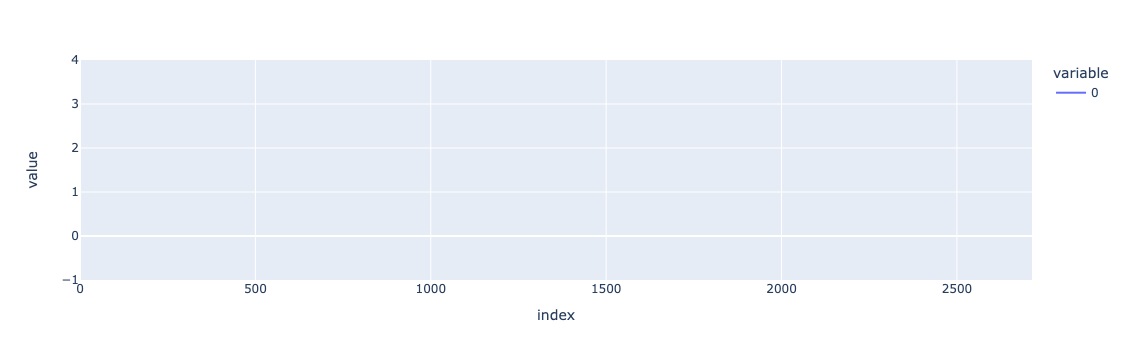

In [251]:
px.line(S)

In [34]:
sliced = V[:10, :]

In [35]:
def cosine(x, Y):
    return jnp.dot(x, Y) / jnp.sqrt(jnp.sum(x**2)) / jnp.sqrt(jnp.sum(Y**2, axis=0))

In [36]:
climb_ids = cf_df.columns

In [37]:
def top_k(name, k=10):
    i = climbs_df[climbs_df['name']==name].index[0]
    i_sort = jnp.where(climb_ids==i)[0][0]
    i_top = cosine(sliced[:, i_sort], sliced).argsort()[::-1][1:k+1]
    return climb_ids[i_top]

In [38]:
boulder = "Everyday Helmet"
climbs_df[climbs_df['name']==boulder]

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,# redpoint,# flashes,# sends,areas_0_name,areas_1_name,areas_2_name,areas_0_slug,areas_1_slug,areas_2_slug,areas_3_name,areas_3_slug,areas_4_name,areas_4_slug,areas_5_name,areas_5_slug,areas_6_name,areas_6_slug,areas_7_name,areas_7_slug,areas_8_name,areas_8_slug,areas_9_name,areas_10_name,areas_11_name,areas_9_slug,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,connected
41763,everyday-helmet-titanic-south-grand-wall-bould...,Everyday Helmet,8361,boulder,34,0,NaN,V5,Start on the fat rail of Timeless. Mantle stra...,10,56,16,82,Squamish,Grand Wall Boulders,Titanic South,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-south-grand-wall-boulders-squamish-bc-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.741379,58.0,True


In [39]:
climbs_df.loc[top_k(boulder)]

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,# redpoint,# flashes,# sends,areas_0_name,areas_1_name,areas_2_name,areas_0_slug,areas_1_slug,areas_2_slug,areas_3_name,areas_3_slug,areas_4_name,areas_4_slug,areas_5_name,areas_5_slug,areas_6_name,areas_6_slug,areas_7_name,areas_7_slug,areas_8_name,areas_8_slug,areas_9_name,areas_10_name,areas_11_name,areas_9_slug,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,connected
climb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59142,sea-of-doubt-titanic-north-grand-wall-boulders...,Sea of Doubt,8360,boulder,37,0,NaN,V5+,Climb the aesthetic diherdral feature on the s...,5,104,16,125,Squamish,Grand Wall Boulders,Titanic North,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-north-grand-wall-boulders-squamish-bc-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.540816,98.0,True
41765,cricket-titanic-north-grand-wall-boulders-squa...,The Cricket,8360,boulder,33,0,NaN,V5-,"Start seated on the undercling, throw right to...",2,81,13,96,Squamish,Grand Wall Boulders,Titanic North,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-north-grand-wall-boulders-squamish-bc-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.176471,68.0,True
94276,double-j-missing-boulders-murrin-park-squamish...,Double J,9098,boulder,28,0,NaN,V4,"Start matched on a sharp undercling, do a big ...",6,18,3,27,Squamish,Murrin Park,The Missing Boulders,squamish-bc-canada,murrin-park-squamish-bc-canada,missing-boulders-murrin-park-squamish-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.130435,23.0,True
92632,stupid-face-easy-chair-grand-wall-boulders-squ...,Stupid Face,7521,boulder,22,0,NaN,V3,Face climb to the left of Easy Chair. Start se...,3,83,10,96,Squamish,Grand Wall Boulders,Easy Chair,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,easy-chair-grand-wall-boulders-squamish-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.441176,68.0,True
92509,black-dyno-thighmaster-grand-wall-boulders-squ...,Black Dyno,7972,boulder,22,0,NaN,V3,None,12,56,11,79,Squamish,Grand Wall Boulders,Thighmaster,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,thighmaster-grand-wall-boulders-squamish-bc-ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.057692,52.0,True
76473,whisker-action-man-north-walls-squamish-bc-canada,The Whisker,8365,boulder,18,0,NaN,V2,None,8,6,6,20,Squamish,North Walls,Action Man,squamish-bc-canada,north-walls-squamish-bc-canada,action-man-north-walls-squamish-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.866667,15.0,True
42556,excavator-viper-grand-wall-boulders-squamish-b...,Excavator,8358,boulder,26,0,NaN,V4-,None,3,80,11,94,Squamish,Grand Wall Boulders,Viper,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,viper-grand-wall-boulders-squamish-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.207547,53.0,True
98785,bo-jo-shelf-black-dyke-grand-wall-boulders-squ...,Bo Jo Shelf,8357,boulder,22,0,NaN,V3,None,1,26,9,36,Squamish,Grand Wall Boulders,Black Dyke,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,black-dyke-grand-wall-boulders-squamish-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.416667,24.0,True
41784,shade-mantel-titanic-north-grand-wall-boulders...,Shade Mantel,8360,boulder,25,0,NaN,V3+,None,19,128,25,172,Squamish,Grand Wall Boulders,Titanic North,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,titanic-north-grand-wall-boulders-squamish-bc-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.918182,110.0,True


## ALS implicit

In [282]:
climbers = pd.Series(stars['user'].unique(), name='climbers')
climbs = pd.Series(stars['climb_id'].unique(), name='climbs')
climbers = climbers.reset_index().set_index('climbers')
climbs = climbs.reset_index().set_index('climbs')

In [285]:
bascents['climber'] = climbers.loc[bascents['user'].values].values
bascents['climb'] = climbs.loc[bascents['climb_id'].values].values
stars['climber'] = climbers.loc[stars['user'].values].values
stars['climb'] = climbs.loc[stars['climb_id'].values].values

/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_30019/3023569730.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xb/ksf3f8q50ws41h95k4th7z4w0000gp/T/ipykernel_30019/3023569730.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
climbers.loc['larathompson'].values[0]

1180

In [287]:
len(climbers), len(climbs)

(2060, 22778)

In [288]:
s_csr = csr_matrix((stars['stars'].values, (stars['climber'].values, stars['climb'].values)), shape=(len(climbers), len(climbs)))

In [289]:
send_model = AlternatingLeastSquares(factors=25, regularization=0.05, alpha=2.0)
send_model.fit(s_csr)

  0%|          | 0/15 [00:00<?, ?it/s]

In [292]:
userid = climbers.loc['larathompson'].values[0]
ids, scores = model.recommend(userid, s_csr[[userid], :], N=200, filter_already_liked_items=True)

In [275]:
recom[recom['type']=='boulder']

,slug,name,area_id,type,grade_id,bolts,length,grade,description,# onsights,# redpoint,# flashes,# sends,areas_0_name,areas_1_name,areas_2_name,areas_0_slug,areas_1_slug,areas_2_slug,areas_3_name,areas_3_slug,areas_4_name,areas_4_slug,areas_5_name,areas_5_slug,areas_6_name,areas_6_slug,areas_7_name,areas_7_slug,areas_8_name,areas_8_slug,areas_9_name,areas_9_slug,areas_10_name,areas_11_name,areas_10_slug,areas_11_slug,ratings_min,ratings_max,ratings_mean,ratings_count,stars_isna,connected
climbs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3119,space-monkey-magic-kingdom-north-walls-squamis...,Space Monkey,6434,boulder,34,0,NaN,V5,Start low with steep compression moves; reach ...,23,314,67,404,Squamish,North Walls,The Magic Kingdom,squamish-bc-canada,north-walls-squamish-bc-canada,magic-kingdom-north-walls-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.459732,298.0,106.0,True
8663,jonesn-kraft-boulders-red-rocks-nv-usa,Jones'n,766,boulder,28,0,NaN,V4,,6,118,19,143,Red Rocks,Kraft Boulders,,red-rocks-nv-usa,kraft-boulders-red-rocks-nv-usa,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.518868,106.0,37.0,True
10944,fried-ant-viper-grand-wall-boulders-squamish-b...,Fried Ant,8358,boulder,9,0,NaN,V0-,,119,97,129,345,Squamish,Grand Wall Boulders,Viper,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,viper-grand-wall-boulders-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.881443,194.0,151.0,True
36410,easy-in-easy-chair-easy-chair-grand-wall-bould...,Easy In An Easy Chair,7521,boulder,29,0,NaN,V4,Traverse left to right on good slopers. A clas...,27,552,88,667,Squamish,Grand Wall Boulders,Easy Chair,squamish-bc-canada,grand-wall-boulders-squamish-bc-canada,easy-chair-grand-wall-boulders-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.071584,461.0,206.0,True
56417,detached-flake-farm-north-walls-squamish-bc-ca...,Detached Flake,6431,boulder,12,0,NaN,V0+,Climb the glorious flake from a sit start. Man...,99,97,144,340,Squamish,North Walls,The Farm,squamish-bc-canada,north-walls-squamish-bc-canada,farm-north-walls-squamish-bc-canada,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.198276,232.0,108.0,True
61048,monkey-bars-kraft-boulders-red-rocks-nv-usa,Monkey Bars,766,boulder,18,0,NaN,V2,,25,56,96,177,Red Rocks,Kraft Boulders,,red-rocks-nv-usa,kraft-boulders-red-rocks-nv-usa,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.044776,134.0,43.0,True
61049,potato-chips-plumber-kraft-boulders-red-rocks-...,Potato Chips,10326,boulder,18,0,NaN,V2,,42,62,115,219,Red Rocks,Kraft Boulders,Plumber,red-rocks-nv-usa,kraft-boulders-red-rocks-nv-usa,plumber-kraft-boulders-red-rocks-nv-usa,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.922581,155.0,64.0,True
61268,wave-kraft-boulders-red-rocks-nv-usa,The Wave,766,boulder,22,0,NaN,V3,,18,40,75,133,Red Rocks,Kraft Boulders,,red-rocks-nv-usa,kraft-boulders-red-rocks-nv-usa,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.520000,100.0,33.0,True
117708,rag-doll-physics-f1-boulderfields-klo-creek-ke...,Rag Doll Physics,10051,boulder,19,0,NaN,V2,,3,10,7,20,Canada,British Columbia,Kelowna,canada,bc-canada,kelowna-bc-canada,The Boulderfields,boulderfields-klo-creek-kelowna-bc-canada,F1,f1-boulderfields-klo-creek-kelowna-bc-canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,3.526316,19.0,1.0,True


In [293]:
recom = climbs_df.loc[climbs[np.isin(climbs, ids)].index]
for c, g in recom[(recom['type']=='boulder') & (recom['areas_0_name']=='Squamish')][['slug', 'grade']].values.tolist():
    cc = c.split('-')
    name = ' '.join(cc)
    print(f'{name: <50}  {g}')

timeless titanic south grand wall boulders squamish bc canada  V5-
space monkey magic kingdom north walls squamish bc canada  V5
tylers dihedral clean boulders north walls squamish bc canada  V3
hold on or be gone jungle apron boulders squamish bc canada  V3-
get your dog off my leg viper grand wall boulders squamish bc canada  V5
simply paradise enchanted boulders paradise valley squamish bc canada  V2-
warm up black dyke grand wall boulders squamish bc canada  V0+
typhoon clean boulders north walls squamish bc canada  V4
speech therapy easy chair grand wall boulders squamish bc canada  V3
no reservations jungle apron boulders squamish bc canada  V0-
immunized death star clean boulders north walls squamish bc canada  V8+
slingshot traverse survivor grand wall boulders squamish bc canada  V4-
tv violence jungle apron boulders squamish bc canada  V5
animal farm farm north walls squamish bc canada     V2
scorch squamish bc canada                           V2
you are not alone jungle apro

# Goodreads

In [170]:
with open('/Users/lara.thompson/Downloads/goodreads_book_works.json', 'r') as f:
    books_titles = []
    for line in f:
        books_titles.append(json.loads(line))
        
books_titles = pd.DataFrame(books_titles)
books_titles.head()

,books_count,reviews_count,original_publication_month,default_description_language_code,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,default_chaptering_book_id,original_publication_day,original_language_id,ratings_count,media_type,ratings_sum,work_id
0,1,6,8,,1,5333265,1984,W. C. Fields: A Life on Film,5:1|4:1|3:1|2:0|1:0|total:3,,,,3,book,12,5400751
1,22,10162,,,741,25717,2001,Good Harbor,5:517|4:1787|3:2763|2:966|1:196|total:6229,,,,6229,book,20150,1323437
2,2,268,,,7,7327624,1987,,5:49|4:58|3:26|2:5|1:3|total:141,,,,141,book,568,8948723
3,38,89252,7,,3504,6066819,2009,Best Friends Forever,5:9152|4:16855|3:19507|2:6210|1:1549|total:53273,,14,,53273,book,185670,6243154
4,2,49,,,5,287140,1990,Runic Astrology: Starcraft and Timekeeping in ...,5:6|4:1|3:3|2:3|1:2|total:15,,,,15,book,51,278577


In [171]:
# books_titles['best_book_id'] = books_titles['best_book_id'].astype(int)
books_titles = books_titles[['best_book_id', 'original_title']].set_index('best_book_id')

In [172]:
with open('/Users/lara.thompson/Downloads/sentiment/goodreads_reviews_young_adult.json', 'r') as f:
    reviews = []
    for line in f:
        reviews.append(json.loads(line))
        
reviews = pd.DataFrame(reviews)

In [173]:
reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,,,0,0
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0
3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,0,0
4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,0,0


In [174]:
ratings = reviews.groupby(['user_id', 'book_id'])['rating'].mean().fillna(2.75).reset_index()

In [175]:
users = pd.Series(ratings['user_id'].unique(), name='users')
books = pd.Series(ratings['book_id'].unique(), name='books')
users.head()

0    00000377eea48021d3002730d56aca9a
1    00009e46d18f223a82b22da38586b605
2    0000c3d51aa099745e93a4e99c4856c8
3    0001085188e302fc6b2568de45a5f56b
4    000157a6f8331e9c9a21252e1fee91d1
Name: users, dtype: object

In [176]:
users = users.reset_index().set_index('users')
books = books.reset_index().set_index('books')
users.head()

,index
users,
00000377eea48021d3002730d56aca9a,0
00009e46d18f223a82b22da38586b605,1
0000c3d51aa099745e93a4e99c4856c8,2
0001085188e302fc6b2568de45a5f56b,3
000157a6f8331e9c9a21252e1fee91d1,4


In [177]:
reviews['user'] = users.loc[reviews['user_id'].values].values
reviews['book'] = books.loc[reviews['book_id'].values].values

In [178]:
ratings['user'] = users.loc[ratings['user_id'].values].values
ratings['book'] = books.loc[ratings['book_id'].values].values

In [179]:
# ratings = reviews.groupby(['user_id', 'book_id'])['rating'].mean().fillna(2.75).reset_index()
ratings.head()

,user_id,book_id,rating,user,book
0,00000377eea48021d3002730d56aca9a,15745753,4.0,0,0
1,00009e46d18f223a82b22da38586b605,11735983,3.0,1,1
2,00009e46d18f223a82b22da38586b605,13335037,3.0,1,2
3,00009e46d18f223a82b22da38586b605,18710190,2.0,1,3
4,00009e46d18f223a82b22da38586b605,2767052,4.0,1,4


In [180]:
ratings[['user', 'book']].max()

user    209151
book     93266
dtype: int64

In [181]:
r_csr = csr_matrix((ratings['rating'].values, (ratings['user'].values, ratings['book'].values)), shape=(209152, 93267))

In [182]:
model = AlternatingLeastSquares(factors=64, regularization=0.05, alpha=2.0)
model.fit(r_csr)

  0%|          | 0/15 [00:00<?, ?it/s]

In [183]:
userid = 1
ids, scores = model.recommend(userid, r_csr[[userid], :], N=10, filter_already_liked_items=True)

In [184]:
read_ids = ratings[ratings['user']==userid]['book_id'].values
books_titles.loc[read_ids[np.isin(read_ids, books_titles.index)]]

,original_title
best_book_id,
11735983,Insurgent
13335037,Divergent
18710190,Allegiant
2767052,The Hunger Games
41865,Twilight
49041,"New Moon (Twilight, #2)"
6148028,Catching Fire
6482837,Before I Fall
7260188,Mockingjay


In [185]:
book_ids = books[np.isin(books['index'], ids)].index

In [186]:
books_titles.loc[book_ids[np.isin(book_ids, books_titles.index)]]

,original_title
books,
428263,Eclipse
1162543,Breaking Dawn
24120519,Library of Souls
7937462,The Short Second Life of Bree Tanner
9593911,Pandemonium
11387515,Wonder
8492825,Where She Went
4374400,If I Stay
4502877,Midnight Sun (Partial Draft)
